In [177]:
#Import the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set_style("white")
sns.color_palette('Set2')
sns.set_context({"figure.figsize": (18, 5)})

# remove warnings
import warnings
warnings.filterwarnings("ignore",category=plt.cbook.mplDeprecation)
warnings.filterwarnings("ignore",category=FutureWarning)



### Helper Functions

In [2]:
def print_categorical_indexes(df):
    print("================================================")
    print(f"Categorical Unique Values")
    
    dtypes = df.dtypes

    for index in dtypes.index:
        if dtypes[index] == 'object':
            print("----------------------------------------")
            print(f"{index}")
            print(df[index].unique())
            print("")
            print("")

### Global

In [143]:
years_list = list(range(2005, 2016))
countries_list = ['Poland', 'Portugal', 'France', 'Spain', 'Germany', 'Switzerland' 'United Kingdom', 
                  'Ireland', 'Sweden', 'Luxembourg', 'Finland', 'Denmark', 'Netherlands', 'Hungary', 'Croatia', 'Greece', 'Romania'
                 ]

### Diseases

#### Load and Explore

In [3]:
df_diseases_raw = pd.read_csv('../raw data/Diseases_GHDx/IHME-GBD_2019_DATA-571888e5-1.csv')
df_diseases_raw.head()

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,6,Incidence,37,Kyrgyzstan,1,Male,22,All Ages,972,Headache disorders,1,Number,2000,284784.143493,320214.245491,248249.750099
1,6,Incidence,37,Kyrgyzstan,2,Female,22,All Ages,972,Headache disorders,1,Number,2000,318105.445247,355938.066073,279634.680100
2,6,Incidence,37,Kyrgyzstan,3,Both,22,All Ages,972,Headache disorders,1,Number,2000,602889.588740,674753.218721,528186.360431
3,6,Incidence,37,Kyrgyzstan,1,Male,22,All Ages,972,Headache disorders,2,Percent,2000,0.028188,0.032116,0.024244
4,6,Incidence,37,Kyrgyzstan,2,Female,22,All Ages,972,Headache disorders,2,Percent,2000,0.030881,0.034716,0.026976


In [4]:
print(df_diseases_raw.columns)
df_diseases_raw.info()

Index(['measure_id', 'measure_name', 'location_id', 'location_name', 'sex_id',
       'sex_name', 'age_id', 'age_name', 'cause_id', 'cause_name', 'metric_id',
       'metric_name', 'year', 'val', 'upper', 'lower'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168120 entries, 0 to 168119
Data columns (total 16 columns):
measure_id       168120 non-null int64
measure_name     168120 non-null object
location_id      168120 non-null int64
location_name    168120 non-null object
sex_id           168120 non-null int64
sex_name         168120 non-null object
age_id           168120 non-null int64
age_name         168120 non-null object
cause_id         168120 non-null int64
cause_name       168120 non-null object
metric_id        168120 non-null int64
metric_name      168120 non-null object
year             168120 non-null int64
val              168120 non-null float64
upper            168120 non-null float64
lower            168120 non-null float64
dtypes: float64(

In [5]:
#  Categorical
print_categorical_indexes(df_diseases_raw)

# Year
print(df_diseases_raw["year"].unique())


Categorical Unique Values
----------------------------------------
measure_name
['Incidence']


----------------------------------------
location_name
['Kyrgyzstan' 'Brazil' 'Uzbekistan' 'China' 'Mauritius' 'Tajikistan'
 'Turkmenistan' 'Chile' 'Democratic Republic of the Congo' 'Andorra'
 'Albania' 'Taiwan (Province of China)' 'Nauru' 'South Africa'
 "Democratic People's Republic of Korea" 'Mongolia' 'Eswatini' 'Malaysia'
 'Bosnia and Herzegovina' 'Zimbabwe' 'American Samoa' 'Bulgaria'
 'Cambodia' 'Indonesia' 'Croatia' 'Benin' 'Burkina Faso' 'Guinea-Bissau'
 "Lao People's Democratic Republic" 'Czechia' 'Cameroon' 'Dominica'
 'Cabo Verde' 'Hungary' 'Russian Federation' 'Ukraine' 'Chad'
 'North Macedonia' 'Timor-Leste' 'Pakistan' 'Afghanistan' "Côte d'Ivoire"
 'Micronesia (Federated States of)' 'Djibouti' 'Sudan' 'Papua New Guinea'
 'Gambia' 'Sao Tome and Principe' 'Japan' 'France' 'Armenia' 'Samoa'
 'Ghana' 'Mozambique' 'Stockholm' 'Montenegro' 'Solomon Islands' 'Guinea'
 'Saint Lucia' 

#### Clean 

- Subset
- Keep only Male and Female
- Keep only by number and val
- remove val decimals

In [192]:
def process_deseases(df, countries_list, years_list):
    
    columns_to_keep = ['location_name', 'sex_name', 'cause_name', 'metric_name', 'year', 'val']

    _df = df[(df["year"].isin(years_list))][columns_to_keep]
    _df = _df[_df["location_name"].isin(countries_list)]
    
    _df = _df[(_df["sex_name"].isin(['Male', 'Female'])) & (_df["metric_name"] == 'Number')]
    _df['val'] = _df['val'].map(round)
    return _df

df_diseases = process_deseases(df_diseases_raw, countries_list,  years_list)
df_diseases.head()

,location_name,sex_name,cause_name,metric_name,year,val
17958,Spain,Male,Stroke,Number,2005,27165
17959,Spain,Female,Stroke,Number,2005,36671
19494,Croatia,Male,Headache disorders,Number,2005,239463
19495,Croatia,Female,Headache disorders,Number,2005,291511
19728,Hungary,Male,Dermatitis,Number,2005,218719


In [204]:
def barplot_by_countries(df, x, h, w, t='', l=''):
    
    fig, axes = plt.subplots(1, 1, sharex=False, figsize=(18,6))
    sns.histplot(data=df, axes = axes, x=x, hue=h, weights=w, multiple='stack', shrink=0.8)
    
    axes.set_title(t)
    axes.set_ylabel(l)
    legend = axes.get_legend()
    legend.set_bbox_to_anchor((1, 1))

    plt.show()

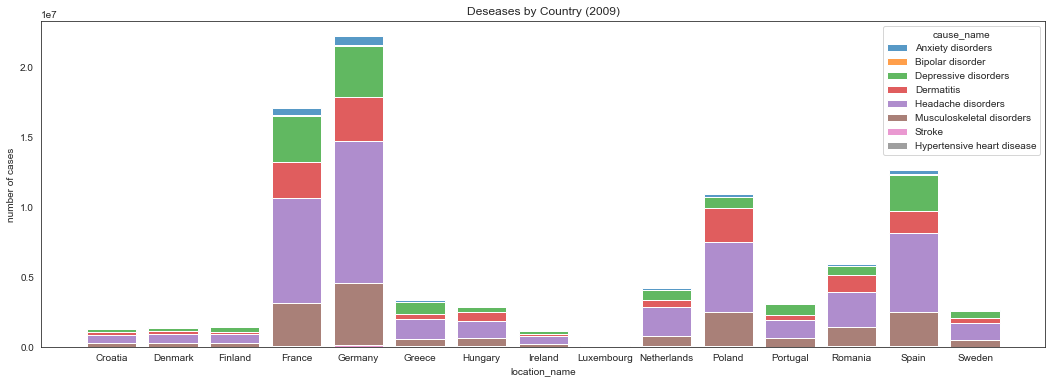

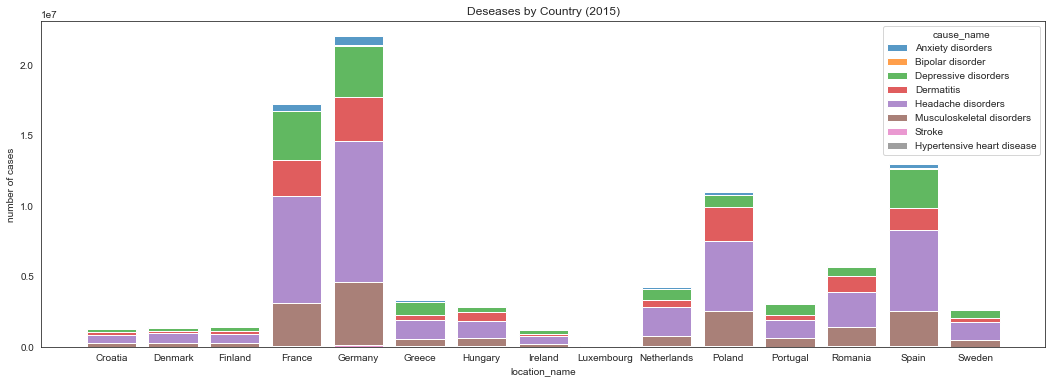

In [206]:

df_1 = df_diseases[df_diseases['year'] == 2008].sort_values(['location_name', 'cause_name'])
df_2 = df_diseases[df_diseases['year'] == 2010].sort_values(['location_name', 'cause_name'])

barplot_by_countries(df_1, x='location_name', h='cause_name', w='val', t='Deseases by Country (2009)', l = 'number of cases')
barplot_by_countries(df_2, x='location_name', h='cause_name', w='val', t='Deseases by Country (2015)', l = 'number of cases')


###  Employment

In [287]:
df_employment_raw = pd.read_excel('../raw data/Employment_WB/Employment_WB.xls',na_values='..')

In [288]:
df_employment_raw.head()

,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,SL.AGR.EMPL.MA.ZS,Afghanistan,AFG,63.650002,64.019997,61.970001,61.150002,60.509998,59.299999,58.389999,...,50.200001,47.810001,45.880001,44.090000,42.299999,40.660000,38.360001,37.259998,36.599998,NaN
1,SL.AGR.EMPL.MA.ZS,Albania,ALB,44.919998,42.959999,41.700001,40.939999,39.779999,38.560001,37.430000,...,38.810001,37.590000,37.570000,36.759998,36.740002,36.290001,34.959999,33.720001,32.709999,NaN
2,SL.AGR.EMPL.MA.ZS,Algeria,DZA,23.709999,23.080000,23.219999,23.360001,21.809999,20.180000,18.709999,...,12.300000,12.290000,12.160000,11.950000,11.780000,11.560000,11.360000,11.050000,10.760000,NaN
3,SL.AGR.EMPL.MA.ZS,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SL.AGR.EMPL.MA.ZS,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [319]:
df = df_employment.copy()

def map_sector_name(row):
    sector_mapping = {
        "SL.AGR.EMPL.FE.ZS": "per_female_agriculture",
        "SL.AGR.EMPL.MA.ZS": "per_male_agriculture",
        "SL.AGR.EMPL.ZS": "per_total_agriculture",
        "SL.EMP.MPYR.FE.ZS": "per_female_employers",
        "SL.EMP.MPYR.MA.ZS": "per_male_employers",
        "SL.EMP.MPYR.ZS": "per_total_employers",
        "SL.IND.EMPL.FE.ZS": "per_female_industry",
        "SL.IND.EMPL.MA.ZS": "per_male_industry",
        "SL.IND.EMPL.ZS": "per_total_industry",
        "SL.SRV.EMPL.FE.ZS": "per_female_services",
        "SL.SRV.EMPL.MA.ZS": "per_male_industry",
        "SL.SRV.EMPL.ZS": "per_total_services"
    }
    return sector_mapping[row]

def clean_sector_name(row):
    return (row
            .replace('per_female_', '')
            .replace('per_male_', '')
           )
    
def extract_gender(row):
    if 'per_female' in row:
        return 'Female'
    elif 'per_male' in row:
        return 'Male'
    else:
        return 'NOT_DEFINED'

    
def process_employment(df):
    
    df_res = pd.DataFrame();
    
    for year in years_list:
        #year = 2010
        #print(f"{year} [YR{year}]")
        col = f"{year} [YR{year}]"
        
        columns_to_keep = ['Series Code', 'Country Name', col]
        
        _df = df.copy()
        _df = _df[_df["Country Name"].isin(countries_list)][columns_to_keep]
        _df['employment_sector'] = _df['Series Code'].apply(map_sector_name)
        _df['gender'] = _df['employment_sector'].apply(extract_gender)
        _df['employment_sector'] = _df['employment_sector'].apply(clean_sector_name)
        _df['year'] = year
        _df['val'] = _df[col]
    
        
        _df = _df[_df["year"].isin(years_list)]
        _df = _df[_df['employment_sector'].isin(['agriculture', 'industry', 'services'])]
        
        df_res = pd.concat([df_res, _df], axis=0)

    
    df_res = (df_res[['Country Name', 'year', 'gender', 'employment_sector', 'val']]
                    .rename(columns={'Country Name':'location_name'})
                  )
    
    df_res['val'] = df_res['val'].fillna(0)
    df_res['val'] = df_res['val'].map(round)
    
    return df_res

df_employment = process_employment(df_employment_raw)


In [320]:
df_employment.head()

,location_name,year,gender,employment_sector,val
48,Croatia,2005,Male,agriculture,16
53,Denmark,2005,Male,agriculture,5
67,Finland,2005,Male,agriculture,7
68,France,2005,Male,agriculture,5
73,Germany,2005,Male,agriculture,3


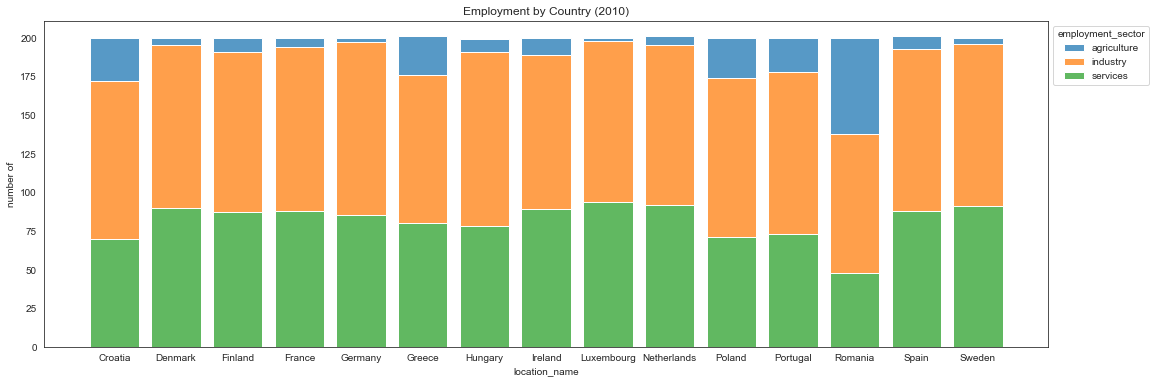

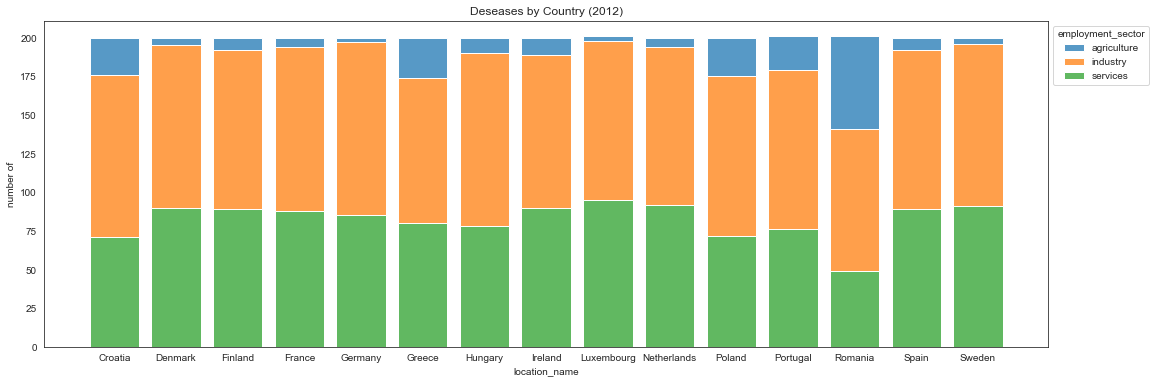

In [321]:

df_1 = df_employment[df_employment['year'] == 2010].sort_values(['location_name', 'employment_sector']).copy()
df_2 = df_employment[df_employment['year'] == 2012].sort_values(['location_name', 'employment_sector']).copy()

barplot_by_countries(df_1, x='location_name', h='employment_sector', w='val', t='Employment by Country (2010)', l = 'number of')
barplot_by_countries(df_2, x='location_name', h='employment_sector', w='val', t='Deseases by Country (2012)', l = 'number of')


##### 